<div align=center>
		
<font size=5>
In the Name of God
<font/>
<p></p>
<br/>
<br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mahdieh Soleimani
</font>
<br/>
<br/>
Fall 2022

<hr/>
<font color=red>
Local Search Practical Assignment (30 + 10 points)
</font>
</div>

<ul>
  <li>Some cell's outputs have not been deleted. you can use these to make sure your implementation is correct.</li>
</ul>

In this assignment you will solve the traveling salesman problem using hill climbing, simulated annealing and genetic algorithms.

In [1]:
# do not import other packages for this assignment
import matplotlib.pyplot as plt
import numpy as np

The traveling salesperson problem (TSP) is a touring problem in which each city must be visited exactly once. The aim is to find the shortest tour. The problem is known to be NP-hard, but an enormous amount of effort has been expended to improve the capabilities of TSP algorithms. In addition to planning trips for traveling salespersons, these algorithms have been used for tasks such as planning movements of automatic circuit-board drills and of stocking machines on shop floors.

In this notebook we will use matplotlib library to visualize the problem. we represent each city as a point in a 800*800 rectnagle. the positions of the cities are randomly chosen. run the next codeblock to randomly choose the cities.

In [2]:
WIDTH = 800
HEIGHT = 800
CITY_NUM = 30


class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y


cities = [City(np.random.randint(10,WIDTH-10),np.random.randint(10,HEIGHT-10)) for i in range(CITY_NUM)] 

The next function helps you visualize the problem.

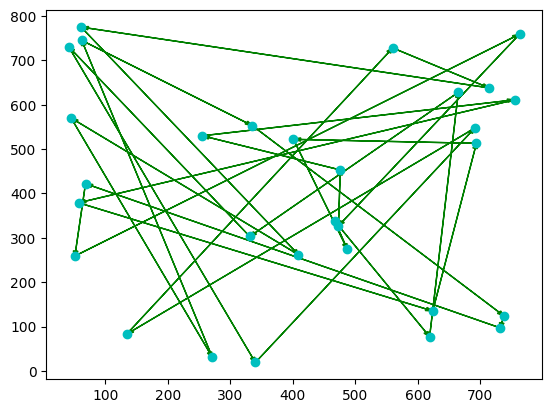

In [3]:
def plotTSP(cities):
    '''
    Inputs:
    - cities : list of cities. ordered by path
    '''
    x = []
    y = []
    for city in cities:
        x.append(city.x)
        y.append(city.y)
    plt.plot(x,y,'co')
    
    a_scale = float(max(x))/float(100)
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale, 
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

plotTSP(cities)

complete the following helper functions. a test cases has been given to you to make sure your implement these functions correctly.

In [4]:
# 5 points

def get_distance_between_two_city(c1 : City, c2 : City):
    '''
    Inputs:
    - c1,c2 : the two cities of type City
    Output: Euclidean distance between them.
    '''
    return np.sqrt(((c1.x - c2.x)**2 ) + ((c1.y - c2.y)**2))
    pass

def get_distance_tsp(cities):
    '''
    Inputs:
    - cities : list of cities of form [c1, c2, ..., cn]. ordered by path
    Output: tsp distance.
    '''
    tsp_distance = 0
    for i in range(len(cities)):
        x = get_distance_between_two_city(cities[i],cities[(i+1)%(len(cities))])
        tsp_distance = tsp_distance + x
    return tsp_distance
    pass

# testcase
c1 = City(10, 10)
c2 = City(10, 20)
c3 = City(20, 10)
c4 = City(40, 40)
print(get_distance_tsp([c1,c2,c3,c4]))  # should be around 102.62

102.6240552495637


# Algorithm 1 : Hill Climbing (12 points)

implement a hill climbing algorithm for the problem. you dont have to add sideways move to the hill climbing algorithm. meaning that if a neighbor with a smaller path length does not exist you can terminate and return the existing path as the solution. we define a neighbouring solution as changing the place of two cities. for example if our solution is [c1, c2, c3, c4, c5] then one of the possible next solution would be [c4, c2, c3, c1, c5].   
at each timestep generate all the possible next solution and pick the best one. if one does not exist return the current solution.  

* make sure to use the .copy function when you want to have another copy of a list.
* print the the distance at each iteration of hill climbing

iteration0,distance=12398.2140221542
iteration1,distance=10551.466572478741
iteration2,distance=9271.351172624123
iteration3,distance=8366.424683521931
iteration4,distance=7839.289008520708
iteration5,distance=7422.119810320661
iteration6,distance=7009.086734592977
iteration7,distance=6854.366360282336
iteration8,distance=6708.374049502041
iteration9,distance=6573.818408012968
iteration10,distance=6110.679269901844
iteration11,distance=6010.223958385931
iteration12,distance=5897.550278354458
iteration13,distance=5794.177175718928
iteration14,distance=5377.892307558238
iteration15,distance=5292.558016603016
iteration16,distance=5228.110559512551
iteration17,distance=5193.472554200396
iteration18,distance=5052.785469503007
iteration19,distance=5015.639162517108
iteration20,distance=4992.708326196835
iteration21,distance=4973.966477100101
iteration22,distance=4956.895096770443
iteration23,distance=4943.745357342147
iteration24,distance=4931.9003809422
iteration25,distance=4919.11483635139

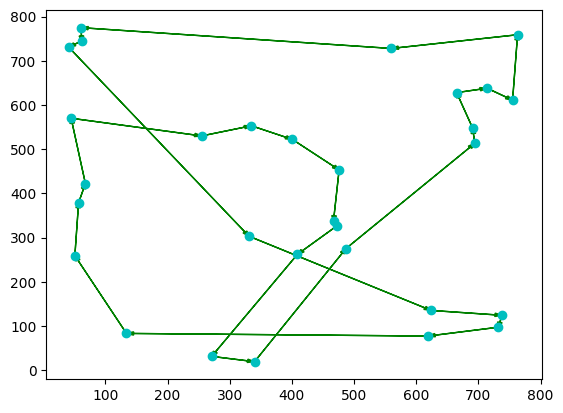

In [5]:
def tsp_hill_climbing(cities):
    '''
    Inputs:
    - cities   : list of cities of form [c1, c2, ..., cn]. ordered by path.
    Output:
    - solution : list of cities of form [c1, c2, ..., cn]. ordered by path.
    '''
    in_itration_cities = cities
    it_num = 0
    while(True):
        is_finished = True 
        neighbors = []
        new_neighbor = []
        for i in range(len(cities)):
            for j in range(i,len(cities)):
                new_neighbor = in_itration_cities.copy()
                new_neighbor[i] = in_itration_cities[j]
                new_neighbor[j] = in_itration_cities[i]
                neighbors.append(new_neighbor)
        current_distance = get_distance_tsp(in_itration_cities)
        for neighbor in neighbors:
            if(get_distance_tsp(neighbor) < current_distance):
                is_finished = False 
                current_distance = get_distance_tsp(neighbor)
                in_itration_cities = neighbor 
        print(f'iteration{it_num},distance={get_distance_tsp(in_itration_cities)}')
        it_num += 1
        if(is_finished):
            break
    return in_itration_cities

solution = tsp_hill_climbing(cities)
print(f'initial path length={get_distance_tsp(cities)}, path length of hill climbing={get_distance_tsp(solution)}')
plotTSP(solution)

# Algorithm 2: Simulated Annealing (13 points)

In this part we will use simulated annealing to solve the tsp problem. In order to generate a random neighbor of a state. choose two cities at random. then flip a fair coin and do one of the following based on the outcome.  
1 - change the position of the two cities (like algorithm 1)  
2 - reverse the cities between these two cities. example : our initial state is [1,2,3,4,5,6] and the two chosen cities are 2 and 5. the resulting neighbor will be [1,5,4,3,2,6] 
we will use exponential decay as a way to schedule the temparture. meaning that in each iteration the temperature is changed to alpha*temperature.    
at each iteration if the neighbour path length is less than the current state we accept that state as our current state. otherwise we will accept it based on the following probability:  
$$p= {e}^{-\frac{\Delta length}{T}}$$
stop the algorithm when temperature is less than a small number. here we will use the variable stopping_temperature for this.

initial path length=14481.003017617704, path length of hill climbing=3718.0775239813825


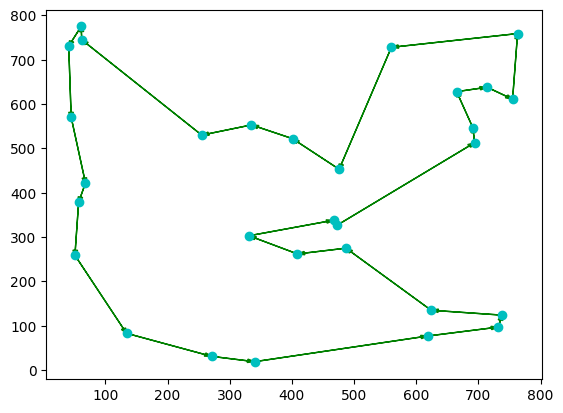

In [10]:
def get_neighbour_state(cities):
    '''
    Inputs:
    - cities    : list of cities of form [c1, c2, ..., cn]. ordered by path.
    Output:
    - neighbour : list of cities of form [c1, c2, ..., cn]. ordered by path.
                  find this neighbour based on the information above.
    '''
    random_pos = np.random.choice(range(len(cities)),2,False).tolist()
    random_pos.sort()
    coin = np.random.choice(range(2),1)
    neighbor = []
    if(coin == 1):
        neighbor = cities.copy()
        neighbor[random_pos[0]] =  cities[random_pos[1]]
        neighbor[random_pos[1]] =  cities[random_pos[0]]
    else:
        neighbor = cities.copy()
        chosen_part = cities[random_pos[0]:random_pos[1]+1]
        chosen_part.reverse()
        neighbor[random_pos[0]:random_pos[1]+1] = chosen_part
    
    return neighbor
        
def simulated_annealing(cities, T=300, alpha=0.99, stopping_temperature=1e-8):
    '''
    Inputs:
    - cities               : list of cities of form [c1, c2, ..., cn]. ordered by path.
    - T                    : the temperature value of simulated annealing.
    - alpha                : exponential decay factor for T.
    - stopping_temparature : stop the alogorithm if T drops below this.
    Output:
    - solution             : list of cities of form [c1, c2, ..., cn]. ordered by path.
    '''
    cities_in_itration = cities.copy()
    final_dis = get_distance_tsp(cities)
    while(T >= stopping_temperature):
        neighbor = get_neighbour_state(cities_in_itration)
        new_dis = get_distance_tsp(neighbor)
        if (new_dis < final_dis ):
            final_dis = new_dis
            cities_in_itration = neighbor
        else:
            power = -(new_dis - final_dis)/T
            prob = np.exp(power)
            random_gen = np.random.binomial(1,prob)
            if(random_gen == 1):
                final_dis = new_dis
                cities_in_itration = neighbor
        T = alpha * T
    return cities_in_itration

solution = simulated_annealing(cities)
print(f'initial path length={get_distance_tsp(cities)}, path length of hill climbing={get_distance_tsp(solution)}')
plotTSP(solution)

# Algorithm 3: genetic algorithm (optional 10 points)

This part is optional and you can earn up to 10 extra point from it. In the theoretical part of this assignment, you created a genetic algorithm for the TSP problem. implement you algotihm here and plot the solution at the end.

initial path length=14481.003017617704, path length of genetic =6034.278245029979


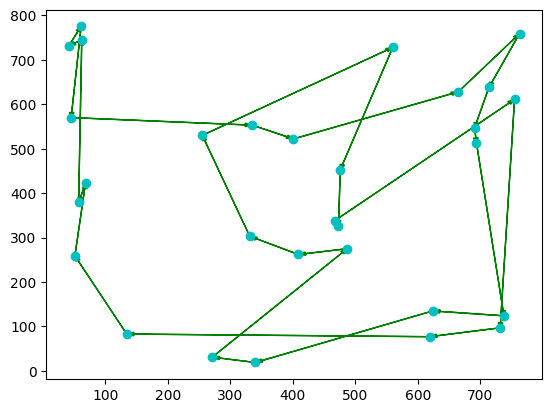

In [141]:

def genetic_algorithm(cities , samples_size ):
    samples = []
    new_cities = cities.copy()
    for i in range(samples_size) :
        np.random.shuffle(new_cities)
        samples.append(new_cities.copy())
    max_distance = 0
    min_distance = get_distance_tsp(samples[0])
    min_sample = samples[0].copy()
    finished = False
    count_of_same_fitness = 0
    while(finished == False):
        distances = []
        fitnesses = []
        chosen_gen = []
        sum_of_fitness =0

        for i in range(samples_size):
            dis = get_distance_tsp(samples[i])
            distances.append(dis)
            if(dis > max_distance):
                max_distance = dis
            if(dis < min_distance):
                min_distance = dis 
                min_sample = samples[i].copy()
                count_of_same_fitness = 0
        
        for i in range(samples_size):
            fitness = ((max_distance - distances[i]))**2
            if(distances[i] < min_distance):
                fitness = fitness * 30
            sum_of_fitness = sum_of_fitness + fitness 
            fitnesses.append(fitness)
        prob  = [ a/sum_of_fitness for a in fitnesses]
        gens_num = np.random.choice(range(samples_size),samples_size, p = prob).tolist()


        for i in range(samples_size):
            chosen_gen.append(samples[gens_num[i]].copy())

        chosen_gen = crossover(chosen_gen , samples_size)
        chosen_gen = mutation(chosen_gen, samples_size)
        samples = chosen_gen
        count_of_same_fitness += 1
        if (count_of_same_fitness > 1000):
            finished = True

    return min_sample

def crossover(chosen_gen , samples_size):
    after_crossover_samples = []
    separator_index = len(chosen_gen[0]) - (len(chosen_gen[0])//4)
    for i in range(samples_size):
        j = (i+1) % samples_size
        cross_part = chosen_gen[i][:separator_index]
        fix_part = chosen_gen[j].copy()

        for C in cross_part:
            if C in fix_part:
                fix_part.remove(C)
        
        crossed = cross_part + fix_part

        after_crossover_samples.append(crossed)
    
    return after_crossover_samples

def mutation(chosen_gen , samples_size):
    mutated = []
    for i in range(samples_size):
        mutated.append(chosen_gen[i].copy())
    city_num = len(chosen_gen[0])
    for i in range(samples_size):
        random_index = np.random.choice(range(city_num),1)[0]
        random_index_j = (random_index+1) % city_num
        mutated[i][random_index] = chosen_gen[i][random_index_j]
        mutated[i][random_index_j] = chosen_gen[i][random_index]

    return mutated
        
        


solution = genetic_algorithm(cities,30)
print(f'initial path length={get_distance_tsp(cities)}, path length of genetic ={get_distance_tsp(solution)}')
plotTSP(solution)
